# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



# Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### The data represents 17 total marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import time 


In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
bank = df

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
pd.set_option('display.max_columns', None)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### There appears to be some 'False' values that will conflict with data analysis. 

In [146]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### There are 10 categorical (object) variables and there 11 numerical (int64 and float64) variables. 

In [9]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
numerical = bank.select_dtypes(include=['int64','float64']).columns
numerical

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [11]:
categorical = bank.select_dtypes(include=['object']).columns
categorical

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

## Univariate Analysis 

In [12]:
#Defined Own Distribution Plot 

def plot_dist(df,xlabel,title):
    #create plot 
    sns.displot(df,color = 'purple', edgecolor = 'blue')
    
    #rotate and set the axis 
    plt.xticks(rotation = 90)
    plt.xlabel(xlabel, fontsize= 12)
    
    #title 
    plt.title(title, fontsize = 14)
    
    #show the plot 
    plt.show()
    

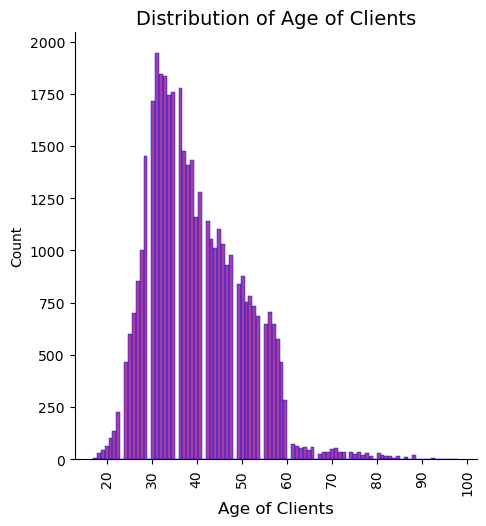

In [13]:
plot_dist(bank['age'], 'Age of Clients','Distribution of Age of Clients')

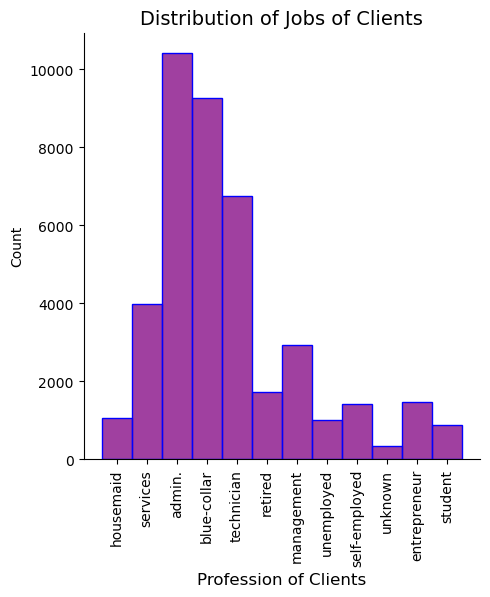

In [14]:
plot_dist(bank['job'], 'Profession of Clients','Distribution of Jobs of Clients')

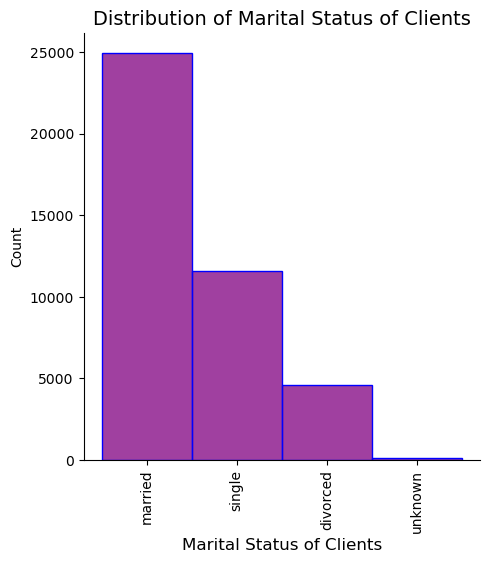

In [15]:
plot_dist(bank['marital'], 'Marital Status of Clients','Distribution of Marital Status of Clients')

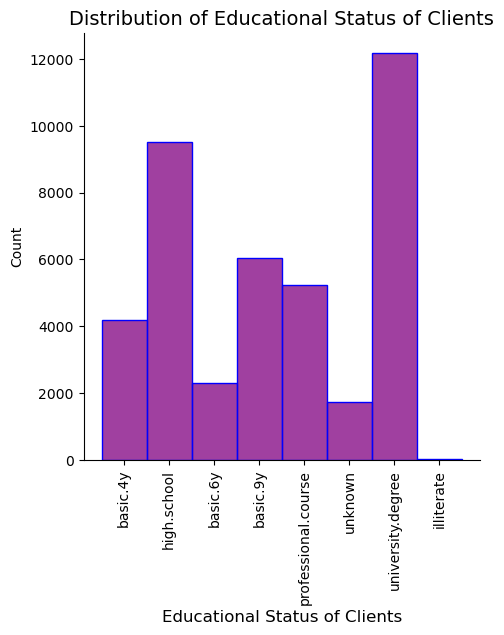

In [16]:
plot_dist(bank['education'], 'Educational Status of Clients','Distribution of Educational Status of Clients')

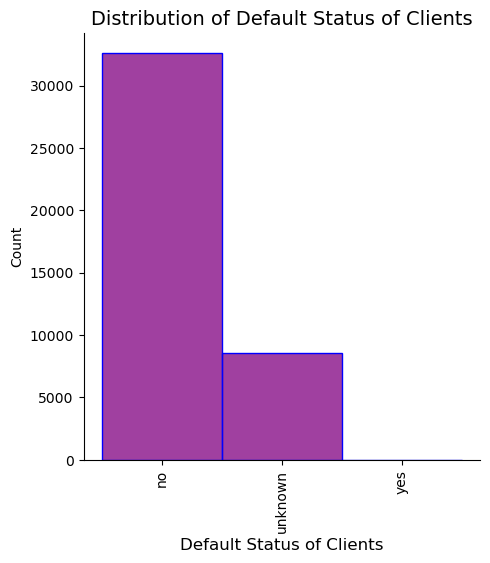

In [17]:
plot_dist(bank['default'], 'Default Status of Clients','Distribution of Default Status of Clients')

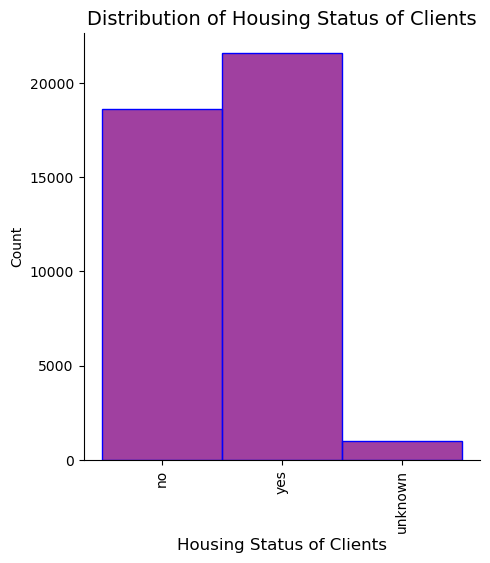

In [18]:
plot_dist(bank['housing'], 'Housing Status of Clients','Distribution of Housing Status of Clients')

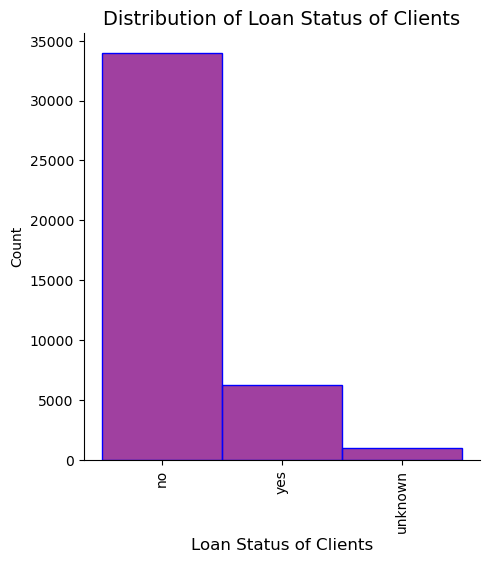

In [19]:
plot_dist(bank['loan'], 'Loan Status of Clients','Distribution of Loan Status of Clients')

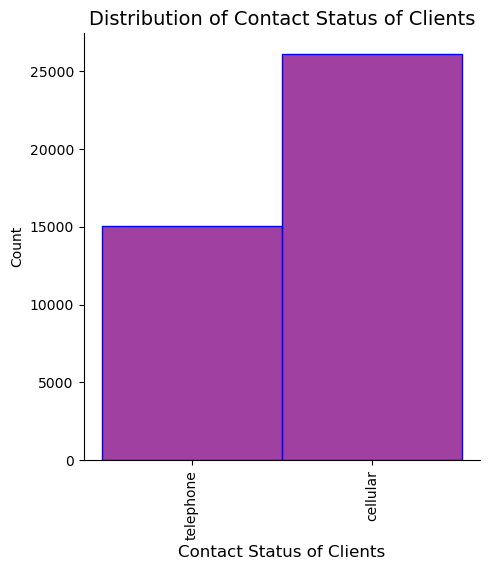

In [20]:
plot_dist(bank['contact'], 'Contact Status of Clients', 'Distribution of Contact Status of Clients')

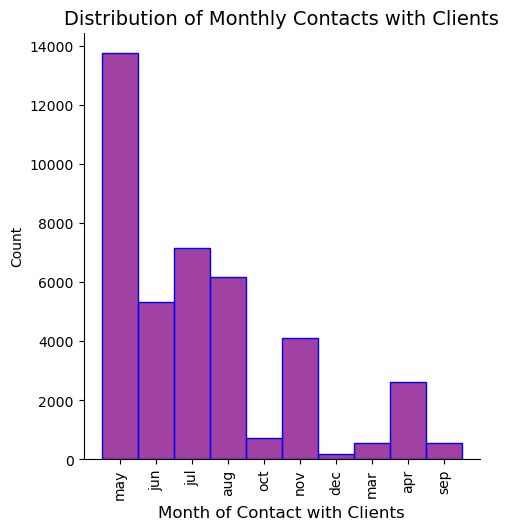

In [21]:
plot_dist(bank['month'], 'Month of Contact with Clients', 'Distribution of Monthly Contacts with Clients')

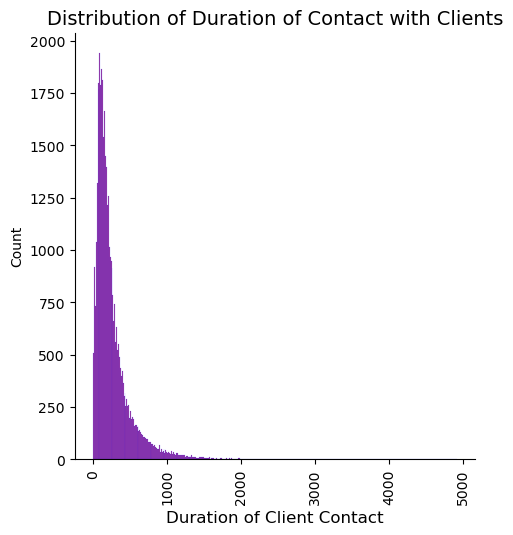

In [22]:
plot_dist(bank['duration'], 'Duration of Client Contact', 'Distribution of Duration of Contact with Clients')

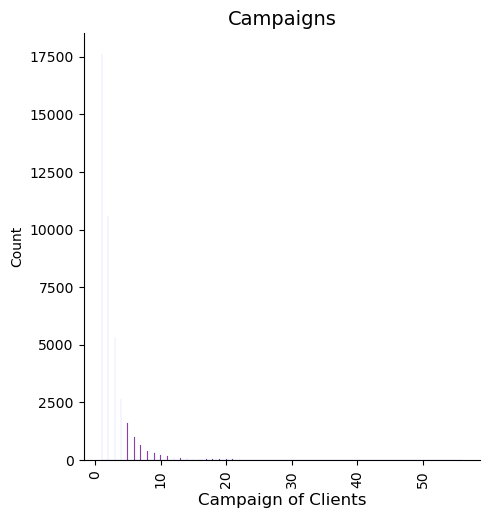

In [23]:
plot_dist(bank['campaign'], 'Campaign of Clients', 'Campaigns')

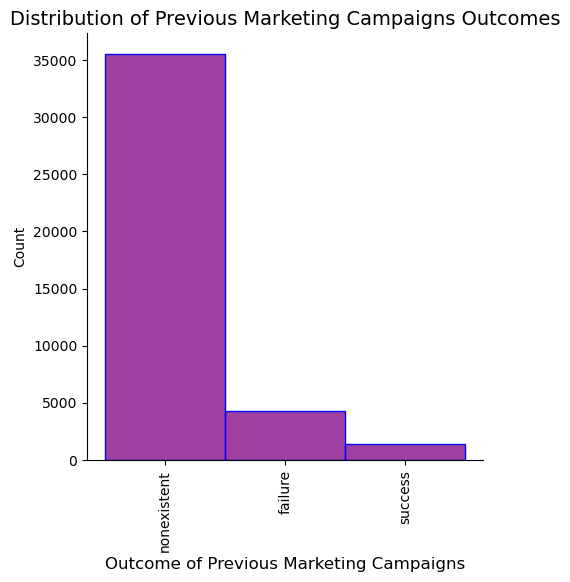

In [24]:
plot_dist(bank['poutcome'], 'Outcome of Previous Marketing Campaigns', 'Distribution of Previous Marketing Campaigns Outcomes')

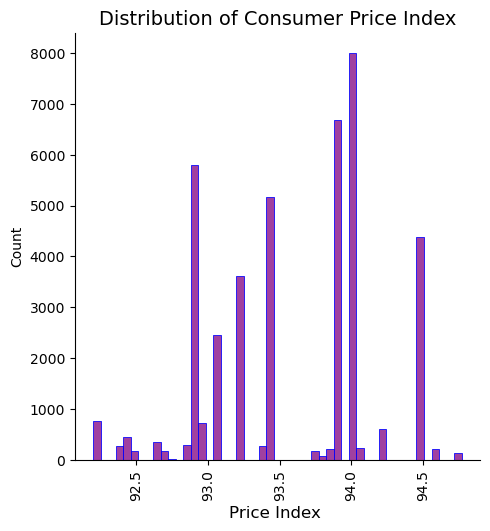

In [25]:
plot_dist(bank['cons.price.idx'], 'Price Index ', 'Distribution of Consumer Price Index')

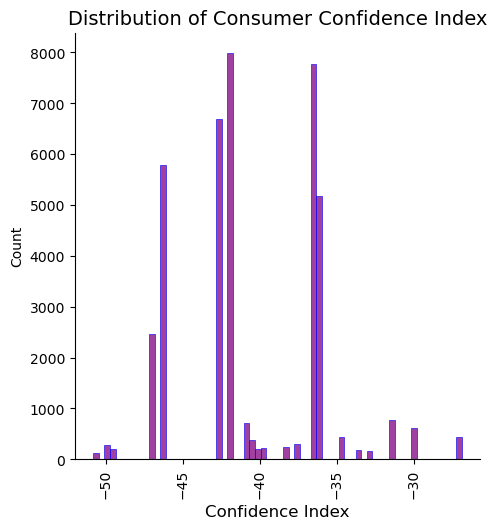

In [26]:
plot_dist(bank['cons.conf.idx'], 'Confidence Index', 'Distribution of Consumer Confidence Index')

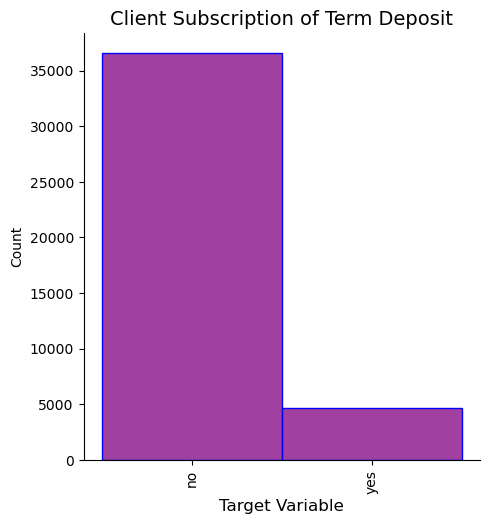

In [27]:
plot_dist(bank['y'], 'Target Variable', 'Client Subscription of Term Deposit')

## Multivariate Analysis 

In [28]:
#Defined own function for boxplots 

def plot_box(df, x, y, xlabel, ylabel, title, hue = None, figsize = (12,16)): 
    
    # Set the style and color palette of the plot 
    sns.set_palette("flare")
    
    #Create the boxplot
    sns.boxplot(x=x, y=y, data=df, hue = hue)
    
    #Set the title and labels
    plt.title(title)
    plt.xlabel(xlabel, fontsize = 9)
    plt.ylabel(ylabel, fontsize = 9)
    plt.xticks(rotation = 90)
    
    #Despine 
    sns.despine()
    
    #Show the plot
    plt.show()


In [30]:
#Defined own function for voilin plots 

def plot_violin(df, x, y, xlabel, ylabel, title, hue = None, figsize = (12,16)): 
    
    #Set the style and color palette of the plot 
    sns.set_palette("deep")
    
    #Create the barplot 
    sns.violinplot(x=x, y=y, data=df, hue = hue)
    
    #Set the title and labels 
    plt.title(title)
    plt.xlabel(xlabel, fontsize = 9)
    plt.ylabel(ylabel, fontsize = 9)
    plt.xticks(rotation = 90)
    
    #Despine 
    sns.despine()
    
    #Show the plot 
    plt.show()

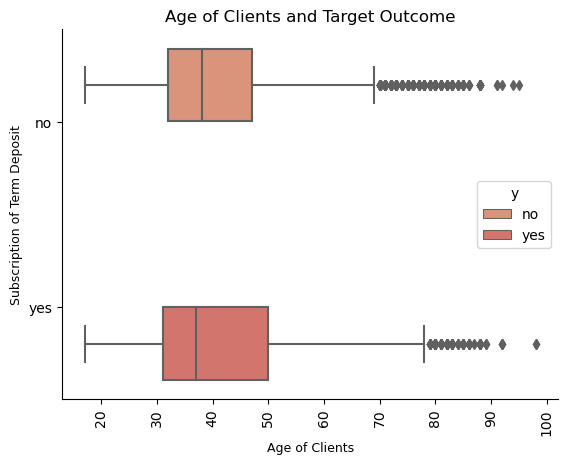

In [32]:
plot_box(bank, 'age','y', 'Age of Clients', 'Subscription of Term Deposit',"Age of Clients and Target Outcome", 'y')

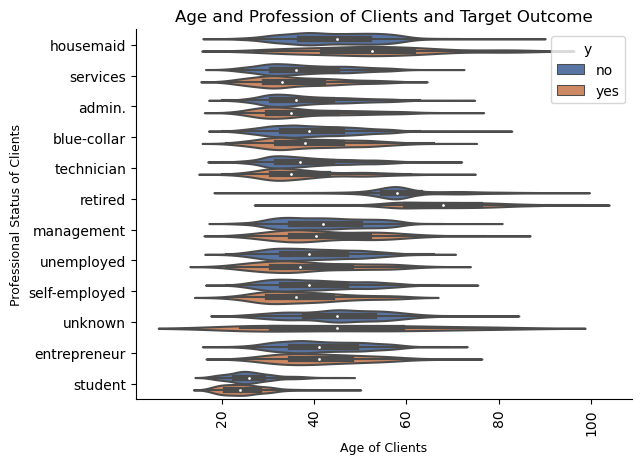

In [33]:
plot_violin(bank, 'age','job', 'Age of Clients', 'Professional Status of Clients',"Age and Profession of Clients and Target Outcome", 'y')

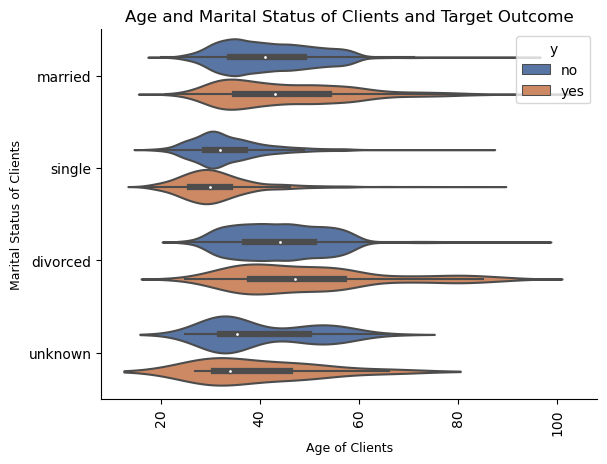

In [34]:
plot_violin(bank, 'age','marital', 'Age of Clients', 'Marital Status of Clients',"Age and Marital Status of Clients and Target Outcome", 'y')

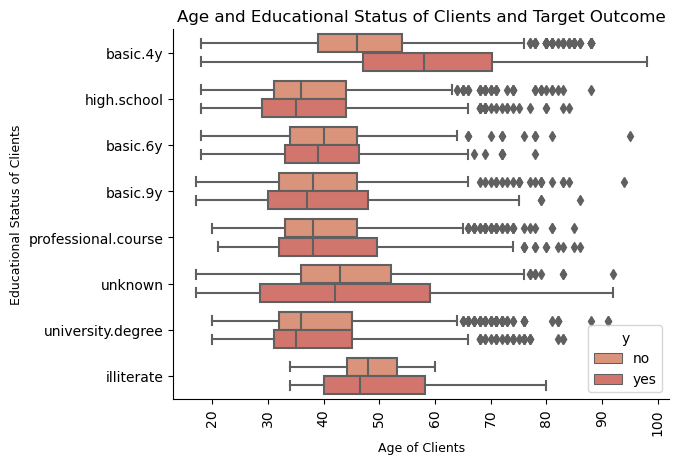

In [35]:
plot_box(bank, 'age','education', 'Age of Clients', 'Educational Status of Clients',"Age and Educational Status of Clients and Target Outcome", 'y')

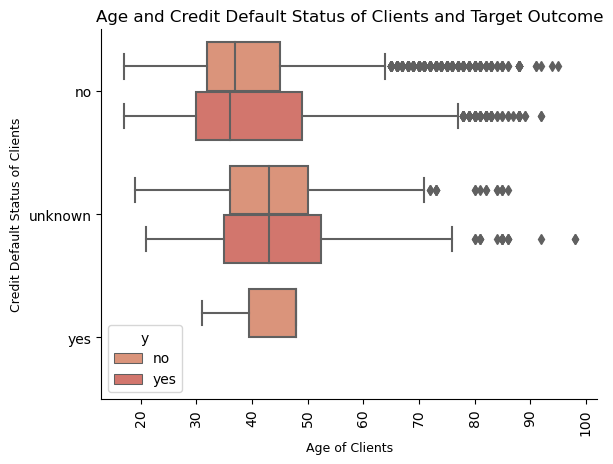

In [36]:
plot_box(bank, 'age','default', 'Age of Clients', 'Credit Default Status of Clients',"Age and Credit Default Status of Clients and Target Outcome", 'y')

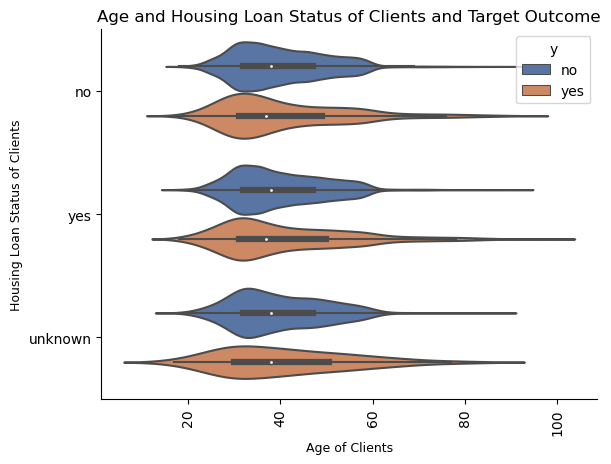

In [37]:
plot_violin(bank, 'age','housing', 'Age of Clients', 'Housing Loan Status of Clients',"Age and Housing Loan Status of Clients and Target Outcome", 'y')

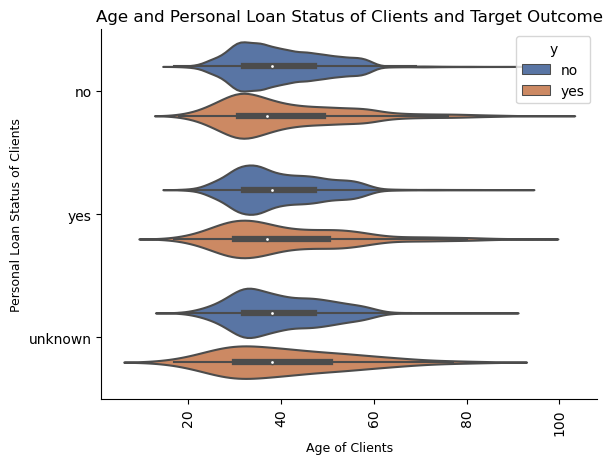

In [38]:
plot_violin(bank, 'age','loan', 'Age of Clients', 'Personal Loan Status of Clients',"Age and Personal Loan Status of Clients and Target Outcome", 'y')

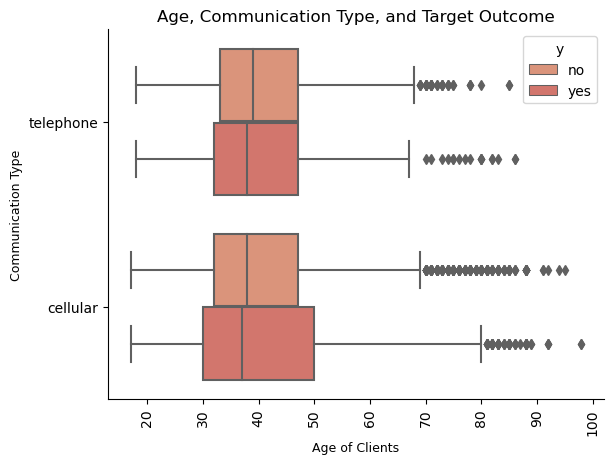

In [39]:
plot_box(bank, 'age','contact', 'Age of Clients', 'Communication Type',"Age, Communication Type, and Target Outcome", 'y')

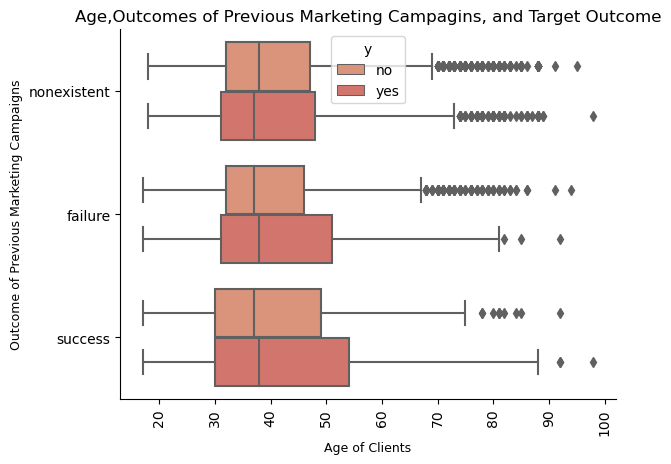

In [40]:
plot_box(bank, 'age','poutcome', 'Age of Clients', 'Outcome of Previous Marketing Campaigns',"Age,Outcomes of Previous Marketing Campagins, and Target Outcome", 'y')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### The business goal is to find a model that can explain success of a contact, and results in the client subscripition to the deposit. This model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.

### Hypothesis 

### Profession, marital status, loan, previous campaign outcomes, and age are the most significant contributors to a successful campagign result of client subscription of the deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

#### Creating the features set 

In [44]:
numerical = bank.select_dtypes(include=['int64','float64']).columns
numerical

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [45]:
categorical = bank.select_dtypes(include=['object']).columns
categorical

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [46]:
select_num = ['age']
select_cat = ['job','marital','education','default','housing','loan']
target = ['y']

deposit = select_num + select_cat + target 
deposit

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

In [47]:
deposit_df = bank[deposit]
deposit_df

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


In [48]:
deposit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   y          41188 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


In [49]:
#Label Econder for target variable 
le = LabelEncoder()
deposit_df['y'] = le.fit_transform(deposit_df['y'])

#Preprocessing data

preprocessor = ColumnTransformer(transformers = [('categorical', OneHotEncoder(), select_cat)], remainder = 'passthrough')


/var/folders/y2/rr8mb9x148s5hzs6yqz_r9vc0000gn/T/ipykernel_1628/3271084465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deposit_df['y'] = le.fit_transform(deposit_df['y'])


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [50]:
#Creating the features and target variable for train/test split 
X = deposit_df.drop('y', axis = 1)
y = deposit_df['y']

#Train/test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

#Fit the data with preprocessor and transform training data 

X_train_fit = preprocessor.fit_transform(X_train)


#Fit the data with preprocessor and transform test data 

X_test_trans = preprocessor.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

#### Baseline Model with DummyClassifier

In [51]:
#Baseline Model with DummyClassifier 

dummy_clf = DummyClassifier(strategy = 'stratified', random_state = 42)

#Fit the Model 
dummy_fit = dummy_clf.fit(X_train_fit, y_train)

#Y Pred

y_pred = dummy_clf.predict(X_test_trans)

#Accuracy 

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.803714493809177

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [52]:
lr = LogisticRegression().fit(X_train_fit, y_train)
start_lr = time.time()
end_lr = time.time()

lr_time = end_lr - start_lr 

/Users/mahsanzare/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Problem 9: Score the Model

What is the accuracy of your model?

In [53]:
#Train Accuracy

y_pred_lr_train = lr.predict(X_train_fit)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
accuracy_lr_train 

#Test Accuracy

y_pred_lr = lr.predict(X_test_trans)
accuracy_lr_test = accuracy_score(y_test,y_pred_lr)
accuracy_lr_test

0.8873512988589464

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### K-Nearest Neighbors (KNN) Model

In [54]:
#Build the KNN model

knn = KNeighborsClassifier().fit(X_train_fit,y_train)


#Training Time

knn_start = time.time()
knn_end = time.time()
knn_time = knn_end - knn_start 


#Training Accuracy
y_train_knn = knn.predict(X_train_fit)
accuracy_knn_train = accuracy_score(y_train, y_train_knn)
accuracy_knn_train


#Test Accuracy 
y_pred_knn = knn.predict(X_test_trans)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn)
accuracy_knn_test

/Users/mahsanzare/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/mahsanzare/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

0.876911871813547

### Decision Tree Model

In [55]:
#Build the Decision Tree model

dt = DecisionTreeClassifier().fit(X_train_fit, y_train)

#Training Time

dt_start = time.time()
dt_end = time.time()
dt_time = dt_end - dt_start 



#Train Accuracy
y_pred_dt_train = dt.predict(X_train_fit)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
accuracy_dt_train



#Test Accuracy 
y_pred_dt = dt.predict(X_test_trans)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt)
accuracy_dt_test


0.8644088370963826

### Support Vector Machine (SVM) Model

In [57]:
#Build the SVM model

svc = SVC().fit(X_train_fit, y_train)


#Training Time

svc_start = time.time()
svc_end = time.time()
svc_time = svc_end - svc_start 


#Train Accuracy
y_pred_svc_train = svc.predict(X_train_fit)
accuracy_svc_train = accuracy_score(y_train, y_pred_svc_train)
accuracy_svc_train

#Test Accuracy 
y_pred_svc = svc.predict(X_test_trans)
accuracy_svc_test = accuracy_score(y_test,y_pred_svc)
accuracy_svc_test

0.8873512988589464

### Data Frame of Models 

In [142]:
comparative_models = pd.DataFrame({
    
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    
    'Train Time': [lr_time, knn_time, dt_time, svc_time],
    
    'Train Accuracy': [accuracy_lr_train, accuracy_knn_train, accuracy_dt_train, accuracy_svc_train],
    
    'Test Accuracy': [accuracy_lr_test, accuracy_knn_test, accuracy_dt_test, accuracy_svc_test]
    
})

comparative_models

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.000028,0.887344,0.887351
1,KNN,0.000035,0.891593,0.876912
2,Decision Tree,0.000025,0.917056,0.864409
3,SVM,0.000030,0.887344,0.887351


#### The most successful models were the Logistic Regression and SVM models with a test accuracy of 0.887. KNN and Decision Tree models had the higher train accuracy. The KNN model took the longest to fit the data. 

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Additional Feature Engineering 

#### I chose to add an additional variable of 'poutcome' to this optimized data analysis because it appeared to be a signficiant variable in the Exploratory Data Analysis. 

In [59]:
second_num = ['age']
second_cat = ['job','marital','education','default','housing','loan', 'poutcome']
second_target = ['y']

opt_deposit = second_num + second_cat + second_target 
opt_deposit

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'poutcome',
 'y']

In [60]:
opt_df = bank[opt_deposit]
opt_df

,age,job,marital,education,default,housing,loan,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,no
1,57,services,married,high.school,unknown,no,no,nonexistent,no
2,37,services,married,high.school,no,yes,no,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,nonexistent,no
4,56,services,married,high.school,no,no,yes,nonexistent,no
...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,nonexistent,yes


### Label Encoder and Preprocessing

In [61]:
#Label Encoder 

le_2 = LabelEncoder()

#Encoding the target variable 

opt_df['y'] = le_2.fit_transform(opt_df['y'])

#Preprocessing - with StandardScaler
preprocessor_2 = ColumnTransformer(transformers = [('num_opt',StandardScaler(), second_num), 
                                                    ('cat_opt', OneHotEncoder(), second_cat)])

/var/folders/y2/rr8mb9x148s5hzs6yqz_r9vc0000gn/T/ipykernel_1628/3738448261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opt_df['y'] = le_2.fit_transform(opt_df['y'])


In [62]:
#Features and Target Variable 
X = opt_df.drop('y', axis = 1)
y = opt_df['y']

#Split into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#Transform the training data
X_train_scaled = preprocessor_2.fit_transform(X_train)

#Transform the test data 
X_test_scaled = preprocessor_2.transform(X_test)


### Hyperparameter Optimization with GridSearchCV and Additional Evaluation Measures

#### GridSearchCV will be used to find the most optimized conditions for the selected algorithms and their respective hyperparameters. ROC  & AUC scoring will also be utilized. 
#### The performance evaluation measures of precision and recall were used in addition to accuracy for the optimized data analysis. 

### Optimized Logistic Regression

In [63]:
#Initialize Logistic Regression

lr_opt = LogisticRegression(penalty = 'l1', random_state = 42, max_iter = 1000)

#Hyperparameter grid 
lr_params = {
    'C': [0.01,0.1,0.5,1,1.5,2.0],
    'solver': ['lbfgs','liblinear', 'sag']
}

#Initialize the GridSearchObject CV
lr_grid = GridSearchCV(lr_opt, param_grid = lr_params, cv = 5, scoring = 'roc_auc')

#Tracking Time 
lr_start_opt = time.time()
lr_end_opt = time.time()
lr_time_opt = lr_end_opt - lr_start_opt 

#Fit the model 

lr_grid.fit(X_train_scaled, y_train)

#Best indicators 

print(lr_grid.best_params_)
print(lr_grid.best_score_)
print(lr_grid.best_estimator_)

best_opt_lr = lr_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_lr_pred_train = best_opt_lr.predict(X_train_scaled)
accuracy_opt_lr_train = accuracy_score(y_train,y_opt_lr_pred_train)
precision_score_lr_train = precision_score(y_train, y_opt_lr_pred_train)
recall_score_lr_train = recall_score(y_train, y_opt_lr_pred_train)


#Model Performance Measures-Test Accuracy

y_opt_lr_pred = best_opt_lr.predict(X_test_scaled)
accuracy_opt_lr = accuracy_score(y_test,y_opt_lr_pred)
precision_score_lr = precision_score(y_test, y_opt_lr_pred)
recall_score_lr = recall_score(y_test, y_opt_lr_pred)

print(accuracy_opt_lr)
print(precision_score_lr)
print(recall_score_lr)


/Users/mahsanzare/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mahsanzare/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mahsanzare/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mahsanzare/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/

{'C': 0.5, 'solver': 'liblinear'}
0.6964410362965276
LogisticRegression(C=0.5, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')
0.8990046127700898
0.6904761904761905
0.1875


### Optimized KNN

In [64]:
#Initialize KNN 

knn_opt = KNeighborsClassifier()


#Hyperparameter grid 

knn_params = {
    'n_neighbors': [1, 5,10,15,20,25,30,35]
}

#Initialize and fit GridSearchObjectCV

knn_grid = GridSearchCV(knn_opt, param_grid = knn_params, cv = 5, scoring = 'roc_auc')
knn_grid.fit(X_train_scaled, y_train)


#Fitting Time 

knn_start_opt = time.time()
knn_end_opt = time.time()
knn_time_opt = knn_end_opt - knn_start_opt


#Best Indicators 

print(knn_grid.best_params_)
print(knn_grid.best_score_)
print(knn_grid.best_estimator_)

best_opt_knn = knn_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_knn_pred_train = best_opt_knn.predict(X_train_scaled)
accuracy_opt_knn_train = accuracy_score(y_train,y_opt_knn_pred_train)
precision_score_knn_train = precision_score(y_train, y_opt_knn_pred_train)
recall_score_knn_train = recall_score(y_train, y_opt_knn_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_knn_pred = best_opt_knn.predict(X_test_scaled)
accuracy_opt_knn = accuracy_score(y_test,y_opt_knn_pred)
precision_score_knn = precision_score(y_test, y_opt_knn_pred)
recall_score_knn = recall_score(y_test, y_opt_knn_pred)



{'n_neighbors': 35}
0.6687618249905019
KNeighborsClassifier(n_neighbors=35)


/Users/mahsanzare/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/mahsanzare/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

### Optimized Decision Tree

In [65]:
#Initialize Decision Tree

dt_opt = DecisionTreeClassifier()


#Hyperparameter grid 

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [25,30,35],
     'min_samples_split': [2,5,10],
     'min_samples_leaf': [2,3,4,5]
}
    



#Initialize and fit GridSearchObjectCV

dt_grid = GridSearchCV(dt_opt, param_grid = dt_params, cv = 5, scoring = 'roc_auc')
dt_grid.fit(X_train_scaled, y_train)


#Fitting Time 

dt_start_opt = time.time()
dt_end_opt = time.time()
dt_time_opt = dt_end_opt - dt_start_opt


#Best Indicators 

print(dt_grid.best_params_)
print(dt_grid.best_score_)
print(dt_grid.best_estimator_)

best_opt_dt = dt_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_dt_pred_train = best_opt_dt.predict(X_train_scaled)
accuracy_opt_dt_train = accuracy_score(y_train,y_opt_dt_pred_train)
precision_score_dt_train = precision_score(y_train, y_opt_dt_pred_train)
recall_score_dt_train = recall_score(y_train, y_opt_dt_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_dt_pred = best_opt_dt.predict(X_test_scaled)
accuracy_opt_dt = accuracy_score(y_test,y_opt_dt_pred)
precision_score_dt = precision_score(y_test, y_opt_dt_pred)
recall_score_dt = recall_score(y_test, y_opt_dt_pred)

{'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.63731902792203
DecisionTreeClassifier(max_depth=35, min_samples_leaf=5, min_samples_split=5)


### Optimized SVM

In [66]:
#Initialize SVM

svm_opt = SVC(random_state = 42)


#Hyperparameter grid 

svm_params = {
    'gamma': [0.1, 1],
    'kernel': ['linear', 'sigmoid']
}
    



#Initialize and fit GridSearchObjectCV

svm_grid = GridSearchCV(svm_opt, param_grid = svm_params, cv = 5, scoring = 'roc_auc')
svm_grid.fit(X_train_scaled, y_train)


#Fitting Time 

svm_start_opt = time.time()
svm_end_opt = time.time()
svm_time_opt = svm_end_opt - svm_start_opt


#Best Indicators 

print(svm_grid.best_params_)
print(svm_grid.best_score_)
print(svm_grid.best_estimator_)

best_opt_svm = svm_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_svm_pred_train = best_opt_svm.predict(X_train_scaled)
accuracy_opt_svm_train = accuracy_score(y_train,y_opt_svm_pred_train)
precision_score_svm_train = precision_score(y_train, y_opt_svm_pred_train)
recall_score_svm_train = recall_score(y_train, y_opt_svm_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_svm_pred = best_opt_svm.predict(X_test_scaled)
accuracy_opt_svm = accuracy_score(y_test,y_opt_svm_pred)
precision_score_svm = precision_score(y_test, y_opt_svm_pred)
recall_score_svm = recall_score(y_test, y_opt_svm_pred)

{'gamma': 0.1, 'kernel': 'linear'}
0.5704308121913249
SVC(gamma=0.1, kernel='linear', random_state=42)


### Evaluation

#### This includes a complete dataset of the optimized comparative models. 

#### Confusion Matrices were utilized to depict the efficacy of the optimized comparative models. 

#### Optimized Comparative Models

In [68]:
#Optimized Comparative Models 

optimized_models = pd.DataFrame({
     'Optimized Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    
     'Train Time': [lr_time_opt, knn_time_opt, dt_time_opt, svm_time_opt],
    
     'Train Accuracy': [accuracy_opt_lr_train, accuracy_opt_knn_train, accuracy_opt_dt_train,accuracy_opt_svm_train],
     
     'Train Precision': [precision_score_lr_train, precision_score_knn_train, precision_score_dt_train, precision_score_svm_train],
    
     'Train Recall': [recall_score_lr_train,recall_score_knn_train,recall_score_dt_train,recall_score_svm_train],
    
     'Test Accuracy': [accuracy_opt_lr,accuracy_opt_knn,accuracy_opt_dt,accuracy_opt_svm],
    
     'Test Precision': [precision_score_lr, precision_score_knn, precision_score_dt,precision_score_svm],
    
     'Test Recall': [recall_score_lr,recall_score_knn,recall_score_dt,recall_score_svm]
})

optimized_models 

,Optimized Model,Train Time,Train Accuracy,Train Precision,Train Recall,Test Accuracy,Test Precision,Test Recall
0,Logistic Regression,0.000024,0.897633,0.660664,0.187769,0.899005,0.690476,0.187500
1,KNN,0.000034,0.893263,0.710583,0.088631,0.892328,0.684685,0.081897
2,Decision Tree,0.000023,0.905797,0.740126,0.252425,0.887594,0.503571,0.151940
3,SVM,0.000034,0.897329,0.648869,0.193157,0.897791,0.660448,0.190733


### The Optimized Logistic Regression was the most effective model with a test accuracy of 0.899.  It also had the highest train accuracy and test precision. The second most effective model was SVM with a test accuracy of 0.897. It has the highest test recall of 0.190, train recall of 0.193, and train accuracy of 0.905. 

#### Confusion Matrices

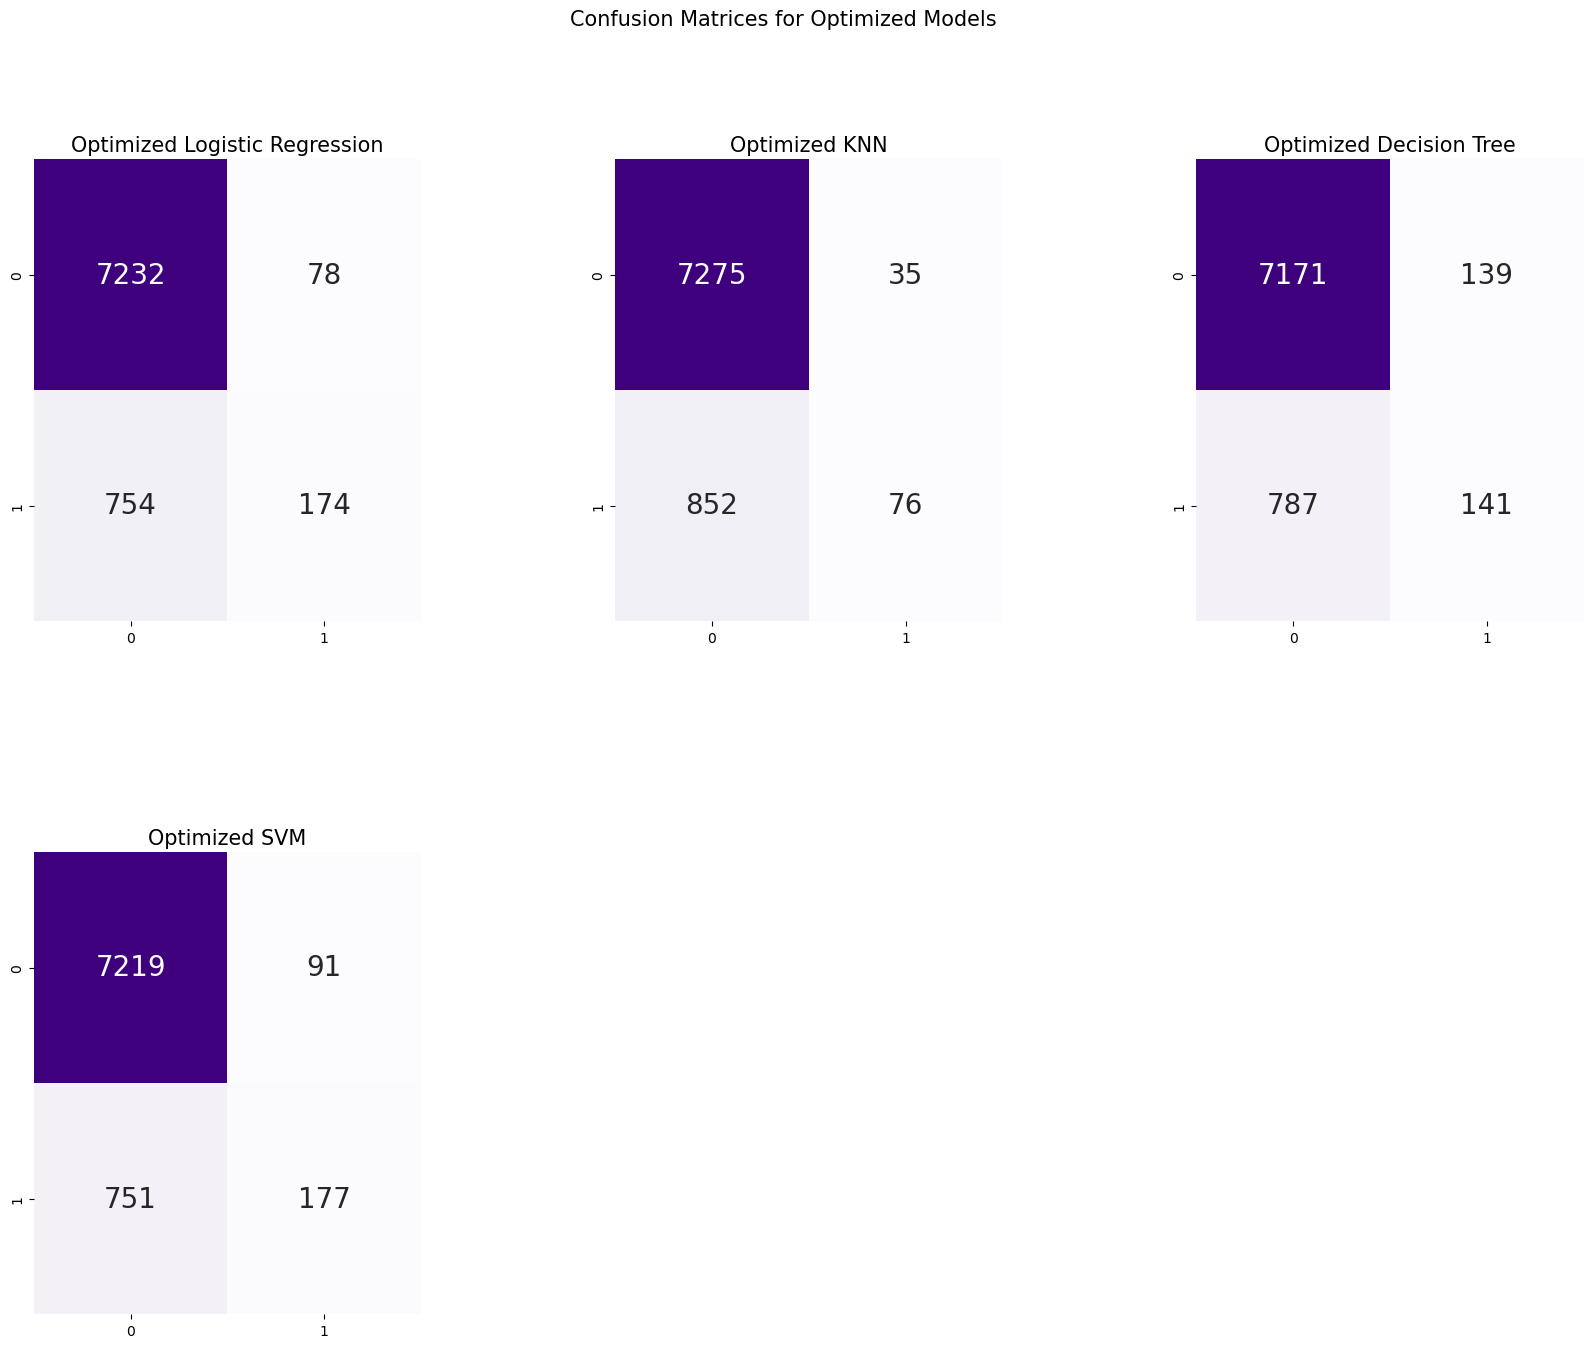

In [81]:
#Confusion Matrices 

cm_lr = confusion_matrix(y_test, y_opt_lr_pred)
cm_knn = confusion_matrix(y_test, y_opt_knn_pred)
cm_dt = confusion_matrix(y_test,y_opt_dt_pred)
cm_svm = confusion_matrix(y_test, y_opt_svm_pred)

#Confusion Matrices Plot 

plt.figure(figsize =(20,15))

plt.suptitle("Confusion Matrices for Optimized Models", fontsize = 15)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(2,3,1)
plt.title('Optimized Logistic Regression',fontsize = 15)
sns.heatmap(cm_lr, annot = True, cmap = 'Purples', fmt = 'd', cbar = False, annot_kws={"size":20})


plt.subplot(2,3,2)
plt.title('Optimized KNN',fontsize = 15)
sns.heatmap(cm_knn, annot = True, cmap = 'Purples', fmt = 'd', cbar = False, annot_kws={"size":20})


plt.subplot(2,3,3)
plt.title('Optimized Decision Tree',fontsize = 15)
sns.heatmap(cm_dt, annot = True, cmap = 'Purples', fmt = 'd', cbar = False, annot_kws={"size":20})


plt.subplot(2,3,4)
plt.title('Optimized SVM',fontsize = 15)
sns.heatmap(cm_svm, annot = True, cmap = 'Purples', fmt = 'd', cbar = False, annot_kws={"size":20})

plt.show()

#### Optimized KNN had the highest true positives and false positives. It had the lowest true negatives. 
#### Optimized SVM had the highest true negatives. 
#### Optimized Decision Trees had the highest false negatives. 

### Conclusion

#### This includes feature importance analysis to determine the most signficant features for a successful client subscription to deposits. 
#### Additionally, this section includes deployment, representing the most features and further recommendations. 

### Feature Importance Analysis 

In [86]:
categorical_columns = list(preprocessor_2.named_transformers_['cat_opt'].get_feature_names_out())
categorical_columns

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [89]:
features = second_num + categorical_columns
features

['age',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [91]:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': best_opt_lr.coef_[0]})
feature_importance = feature_importance.sort_values('Importance', ascending = False)
feature_importance.head(10)

,Feature,Importance
36,poutcome_success,1.463440
9,job_student,0.875776
6,job_retired,0.781791
11,job_unemployed,0.184207
24,education_unknown,0.164157
23,education_university.degree,0.110697
0,age,0.089428
1,job_admin.,0.055689
7,job_self-employed,0.000000
16,marital_unknown,0.000000


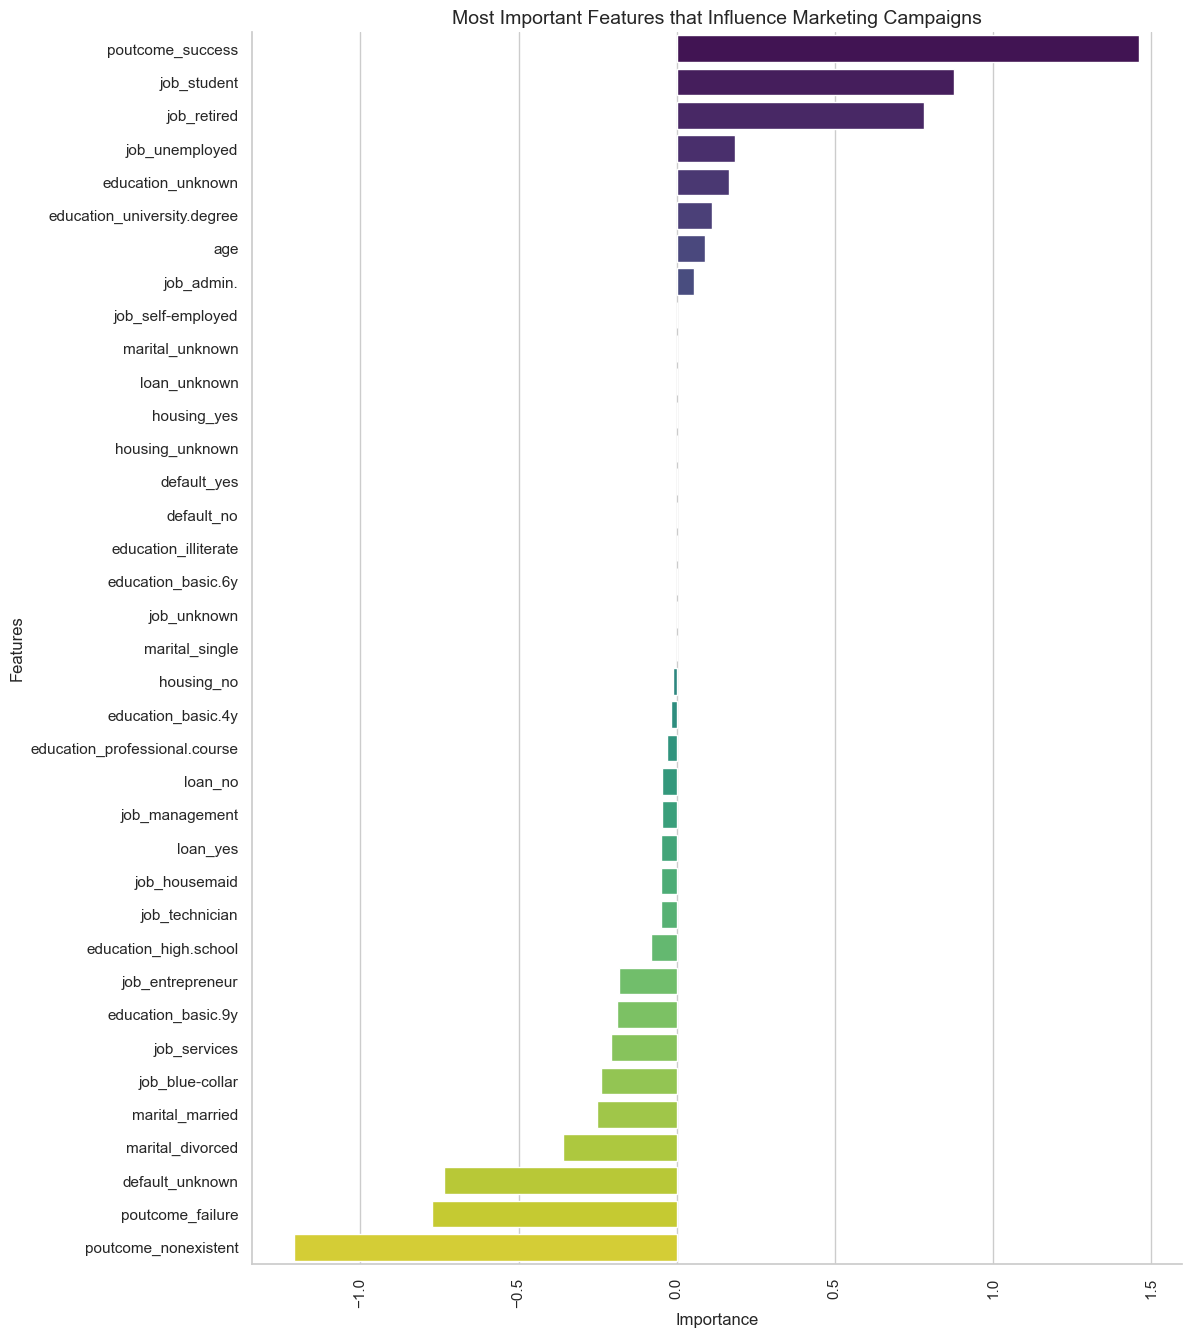

In [150]:
plt.figure(figsize=(12, 16))
sns.barplot(x= feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')
plt.title('Most Important Features that Influence Marketing Campaigns', fontsize = 14)
plt.xlabel('Importance',fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.xticks(rotation = 90)
sns.despine()
plt.show()

### Findings

#### Poutcome was the most important feature, which demonstrates previous marketing campaign experiences influence successful marketing campaigns in the future. Job was the second most important features, with those that are students, retired, and unemployment. Following job, age was the next important feature. Marital status and loan were not imporant features. 

### Deployment

In [139]:
#Defined Own Distribution Plot 

def plot_dist_2(df,xlabel, title):
    #create plot 
    sns.displot(df,color = 'orange', edgecolor = 'yellow')
    
    #rotate and set the axis 
    plt.xticks(rotation = 90)
    plt.xlabel(xlabel, fontsize= 12)

    
    #title 
    plt.title(title, fontsize = 14)
    
    #show the plot 
    plt.show()

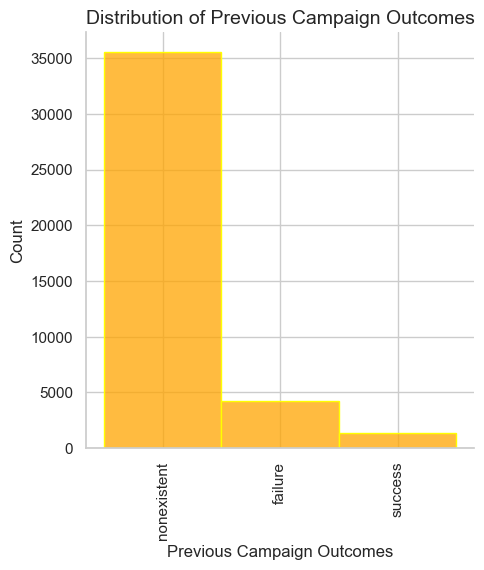

In [140]:
plot_dist_2(bank['poutcome'], 'Previous Campaign Outcomes', 'Distribution of Previous Campaign Outcomes')

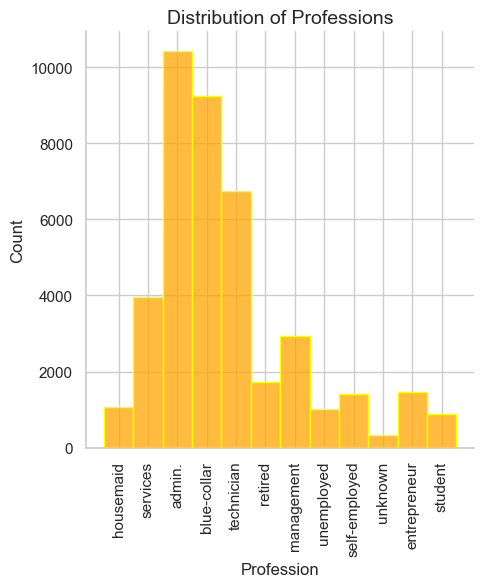

In [141]:
plot_dist_2(bank['job'], 'Profession', 'Distribution of Professions')

### The overall recommendations for the marketing campaign is: 
### 1. Focus on previous marketing campaigns that were successful and retarget those clients with new marketing campaigns, since there is a precedent of success with those clients. 
### 2. Reflect on previous successful marketing campaigns and analyze their advantages and disadvantages, then improve areas of weakness.
### 3. Tailor and target market campaigns to those clients with the professional statuses of student, retired, and unemployed.  

##### Questions